In [ ]:
!pip install numpy
!pip install matplotlib
!pip install utils
!pip install pandas as pd
%pip install openpyxl

In [3]:
import pandas as pd
file_path = '/home/abrar/Desktop/Code/Temporal HPC/Frontier HPC & Facility Data.xlsx'

# Read the second sheet (index 1, since indexing starts at 0)
df = pd.read_excel(file_path, sheet_name=1)

# Now 'df' contains the data from the second sheet

In [4]:

# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# gill sans
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Gill Sans"
import sys 
# sys.path.append("..")  # This line might not be necessary after installation
import utils # Now you should be able to import utils if the required module is within python-utils

In [5]:

# Remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Convert relevant columns to numeric
columns_to_convert = [
    'Frontier Compute Power', 
    'Frontier Facility accessory Power', 
    'Frontier Total Power', 
    'Power Usage Effectiveness'

]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna(subset=['Frontier Compute Power'])
df = df.dropna(subset=['Frontier Facility accessory Power'])

print(df.dtypes)


Date/Time                               object
SubLoop1-Coolant Return Temp            object
SubLoop1-Coolant FLow                   object
SubLoop2-Coolant Return Temp            object
SubLoop2-Coolant FLow                   object
SubLoop3-Coolant Return Temp            object
SubLoop3-Coolant FLow                   object
Overall-average Coolant Return Temp     object
Overall Coolant Supply Temp             object
Overall Coolant FLow                    object
SubLoop1_WasteHeat                      object
SubLoop2_WasteHeat                      object
SubLoop3_WasteHeat                      object
Overall_WasteHeat                       object
Frontier Compute Power                 float64
Frontier Facility accessory Power      float64
Frontier Total Power                   float64
Power Usage Effectiveness              float64
dtype: object


In [6]:
# Resample data to hourly frequency and take the mean
df_hourly = df.resample('60min', on='Date/Time').mean()

# Resample data to 2-hourly frequency and take the mean
# df_hourly = df.resample('1h', on='Date/Time').mean()

/home/abrar/Desktop/Code/Temporal HPC/myenv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


In [7]:
# Filter data for the desired date range

start_date = '2023-03-01'
end_date = '2023-03-31'
filtered_df = df_hourly[(df_hourly.index >= start_date) & (df_hourly.index <= end_date)]

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame and it has columns named 'Date/Time' and 'Frontier Compute Power'
# # Adjust column names if necessary

# # Convert 'Date/Time' column to datetime objects if it's not already
# # Skip the first row (header) which likely contains "TimeStamp"
# df['Date/Time'] = pd.to_datetime(df['Date/Time'][1:], errors='coerce')

# # Drop the first row (header) from the DataFrame as well
# df = df[1:]

# # Create the plot
# plt.figure(figsize=(12, 6))  # Adjust figure size as needed
# plt.plot(df['Date/Time'], df['Frontier Compute Power'])
# plt.xlabel('Date/Time')
# plt.ylabel('Frontier Compute Power')
# plt.title('Frontier Compute Power over Time')
# plt.grid(True)  # Add gridlines for better readability
# plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed
# plt.tight_layout() # Adjust layout to prevent labels from overlapping
# plt.show()

In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Filter data for the desired date range
# start_date = '2023-04-01'
# end_date = '2023-05-01'
# filtered_df = df_hourly[(df_hourly.index >= start_date) & (df_hourly.index <= end_date)]

# # Create the plot
# plt.figure(figsize=(12, 6))
# plt.plot(filtered_df.index, filtered_df['Frontier Compute Power'])
# plt.xlabel('Date/Time')
# plt.ylabel('Frontier Compute Power (MW)')
# plt.title('Frontier Compute Power over Time (March 2023 - June 2023)')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt



# # Verify column names to ensure they match the data
# # print(filtered_df.columns)

# # Set up customizations for plot aesthetics
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# # plt.rcParams["font.family"] = "Gill Sans"

# # Create the plot
# fig, ax = plt.subplots(figsize=(7, 2.5))  # Match dimensions

# # Plot the first data series
# ax.plot(filtered_df.index, filtered_df['Frontier Compute Power'], label='Frontier Compute Power', color='#f03b20', linewidth=1.5)

# # Add labels and customize
# # ax.set_xlabel('Date/Time', fontsize=13)
# ax.set_ylabel('Power (MW)', fontsize=13)
# ax.tick_params(axis='both', which='major', labelsize=12)

# # Title is optional, commented out as per original intention
# # ax.set_title('Frontier Compute Power over Time', fontsize=13)

# # Add gridlines
# ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Add legend to differentiate the series
# ax.legend(loc='upper left', frameon=False, fontsize=12)

# # Tight layout and save
# plt.tight_layout()
# plt.savefig("frontier_compute_power.pdf", bbox_inches='tight')

# # Show the plot
# plt.show()


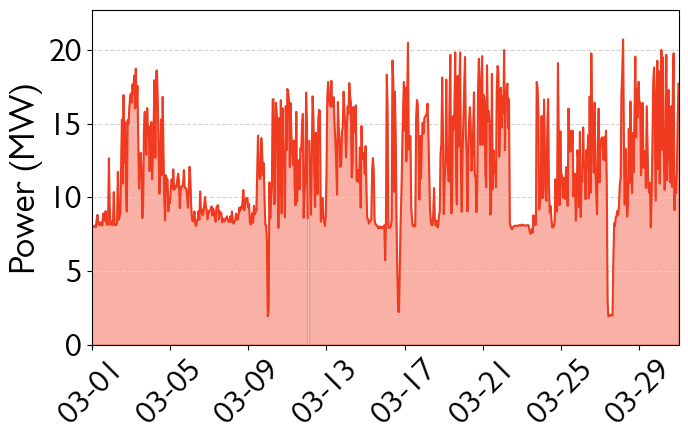

In [13]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# # Filter data for the desired date range
# start_date = '2023-03-01'
# end_date = '2023-03-31'
# filtered_df = df_hourly[(df_hourly.index >= start_date) & (df_hourly.index <= end_date)]

# Create the plot
fig, ax = plt.subplots(figsize=(7, 4.5))  # Match dimensions

# Plot the first data series
ax.plot(filtered_df.index, filtered_df['Frontier Compute Power'], label='Frontier Compute Power', color='#f03b20', linewidth=1.5)

# Fill the area beneath the line plot
ax.fill_between(
    filtered_df.index,
    filtered_df['Frontier Compute Power'],
    color='#f03b20',
    alpha=0.4,  # Adjust transparency for better visualization
)

# Add labels and customize
ax.set_ylabel('Power (MW)', fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=24)

# Add gridlines
ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to match the desired date range
ax.set_xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))

# Set y-axis limits explicitly to start at 0
ax.set_ylim(0, filtered_df['Frontier Compute Power'].max() + 2)  # Add some padding above the max value


# Use a custom date formatter to show only month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format as 'MM-DD'

# Tight layout and save
plt.tight_layout()
plt.savefig("frontier_compute_power.pdf", bbox_inches='tight')

# Show the plot
plt.show()



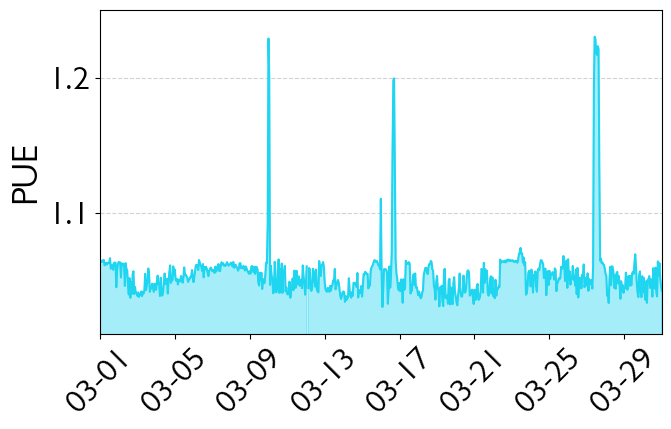

In [17]:
# Determine the dynamic y-axis limits with some padding
y_min = filtered_df['Power Usage Effectiveness'].min()
y_max = filtered_df['Power Usage Effectiveness'].max()
y_padding = (y_max - y_min) * 0.1  # Add 10% padding on both sides

# Set the y-axis limits dynamically
ax.set_ylim(y_min - y_padding, y_max + y_padding)

fig, ax = plt.subplots(figsize=(7, 4.5))  # Match dimensions

# Plot the first data series
ax.plot(filtered_df.index, filtered_df['Power Usage Effectiveness'], label='Power Usage Effectiveness', color='#20D5F0', linewidth=1.5)

# Fill the area beneath the line plot
ax.fill_between(
    filtered_df.index,
    filtered_df['Power Usage Effectiveness'],
    color='#20D5F0',
    alpha=0.4,  # Adjust transparency for better visualization
)

# Add labels and customize
ax.set_ylabel('PUE', fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=24)

# Add gridlines
ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to match the desired date range
ax.set_xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))

# Dynamically set y-axis limits based on the data
y_min = filtered_df['Power Usage Effectiveness'].min()
y_max = filtered_df['Power Usage Effectiveness'].max()
y_padding = (y_max - y_min) * 0.1  # Add 10% padding
ax.set_ylim(y_min - y_padding, y_max + y_padding)

# Use a custom date formatter to show only month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format as 'MM-DD'



# Add legend to differentiate the series
# ax.legend(loc='upper left', frameon=False, fontsize=12, bbox_to_anchor=(0.001, 1.03))

# Tight layout and save
plt.tight_layout()
plt.savefig("frontier_power_usage_effectiveness.pdf", bbox_inches='tight')

# Show the plot
plt.show()


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# # Set default font family
# matplotlib.rcParams['font.family'] = 'Gill Sans'  # Replace with the installed font name


In [3]:
locations = ['/home/abrar/Downloads/gill-sans-2/']

In [4]:
font_files = font_manager.findSystemFonts(fontpaths = locations)

In [5]:
for file in font_files:
    font_manager.fontManager.addfont(file)

Text(0.5, 0.5, 'Matplotlib for Storytellers')

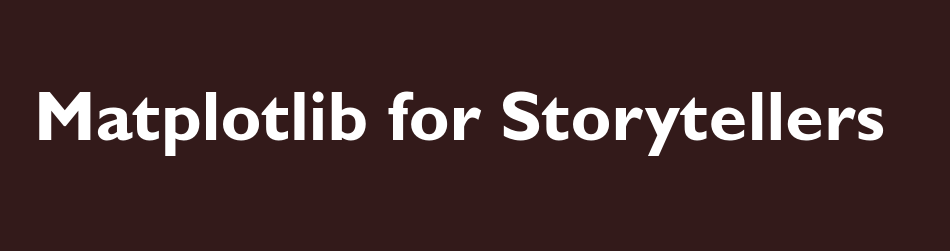

In [6]:
# example

fig, ax = plt.subplots(figsize = (12,3), facecolor = (.2, .1, .1))

ax.axis('off')
fig.text(0.5, 0.5, 'Matplotlib for Storytellers', ha = 'center', fontname = 'Gill Sans', 
        size = 50, fontweight = 'extra bold', color = 'white', va = 'center')